In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
infile = 'output_measures_textsim_norm.csv'
df = pd.read_csv(infile)
df.sample(5)

,metric,measure,which_comparisons
2412,word_mover_MUSE,0.766146,SAME
2404,word_mover_MUSE,0.846715,SAME
2949,unisent-cosine,0.312284,DIFF
1296,cosine_MUSE,0.690906,SAME
799,bw_0.5_gn300model,0.912840,SAME


In [13]:
df2=pd.read_csv("output_multilingual_unisent.csv",sep="\t")
df2.sample(5)

,metric,measure,which_comparisons
209,multi-unisent-cosine,0.428038,DIFF
162,multi-unisent-cosine,0.882444,SAME
235,multi-unisent-cosine,0.467787,DIFF
151,multi-unisent-angdist,0.345286,DIFF
44,multi-unisent-angdist,0.337549,DIFF


In [14]:
print(df.shape)
print(df2.shape)
df=df.append(df2)
print(df.shape)

(3498, 3)
(318, 3)
(3816, 3)


In [3]:
def normalise(scores,inverse=False):
    mn=min(scores)
    mx=max(scores)
    if inverse:
        return [1-((x-mn)/(mx-mn)) for x in scores]
    else:
        return [(x-mn)/(mx-mn) for x in scores]
    
def score(same_scores,diff_scores,inverse=False):
    """
    Compute mean differences and max/min difference.
    Parameters:
        @same_scores - a list of scores, not normalised, for matching sentences
        @diff_scores - a list of scores, not normalised, for non-matching sentences
        @return intermean_dist,intergroup_dist - See comments at top of file
    """
    #norms=normalise(same_scores+diff_scores,inverse)
    #s1=norms[0:len(same_scores)]
    #s2=norms[len(same_scores):]
    s1=same_scores
    s2=diff_scores
    intermean_dist=np.mean(s1)-np.mean(s2)
    intergroup_dist=min(s1)-max(s2)
    return intermean_dist,intergroup_dist

In [4]:
metrics = df.metric.unique()

for metric in metrics:
    SAME = list(df[(df.metric==metric) & (df.which_comparisons=='SAME')]['measure'].values)
    DIFF = list(df[(df.metric==metric) & (df.which_comparisons=='DIFF')]['measure'].values)
    print(metric)
    print(score(SAME,DIFF))

cosine_gn300model
(0.2830593701976243, -0.8757176696398653)
cloud_gn300model
(0.3883639068788712, -0.32752896591229463)
bw_0.001_gn300model
(0.44416173123494596, -0.33327915451447654)
bw_0.01_gn300model
(0.44412741774665326, -0.3333279405806765)
bw_0.1_gn300model
(0.44246594770100706, -0.33330630029261743)
bw_0.5_gn300model
(0.4040323849566329, -0.38870592942213206)
bw_1.0_gn300model
(0.32511477229098984, -0.5950880935373428)
word_mover_gn300model
(0.40017718617557785, -0.435749390190437)
cosine_MUSE
(0.23167577020987506, -0.7481968405012083)
cloud_MUSE
(0.32295833352945713, -0.2505032211042262)
bw_0.001_MUSE
(0.3490564912570449, -0.35413170940440575)
bw_0.01_MUSE
(0.3490631928781305, -0.35416316899189815)
bw_0.1_MUSE
(0.34846533324441237, -0.35414953257729753)
bw_0.5_MUSE
(0.28896882190865614, -0.3509780288305584)
bw_1.0_MUSE
(0.21872187082381, -0.4565509261600783)
word_mover_MUSE
(0.33988006997639614, -0.40883261006787947)
CR5
(0.44022588077762254, -0.33335705944250427)
unisent-angdi

**What Scott obtained**
``` 
Word vector means and cosine (current approach)...
(0.28767865033875095, -0.8757177962997202)
Word cloud average method...
(0.3883638911581385, -0.3275290310983895)
Word cloud kernel methods (third output is bandwidth)....
bw=0.001
(0.4439189130777145, -0.33330660581135085)
bw=0.01
(0.444103107479086, -0.33333072323148244)
bw=0.1
(0.444094932442323, -0.33333306836689447)
bw=0.5
(0.44019616531735517, -0.33716532345078926)
bw=1.0
(0.4243676609087234, -0.37013378635082334)
Word mover distance...
(0.41411574132376233, -0.5017061353901436)
CR5 document embeddings
(0.44022588077762237, -0.3333570594425044)
Set intersection over set union...
(0.4218992821248516, -0.39316239316239315)

```

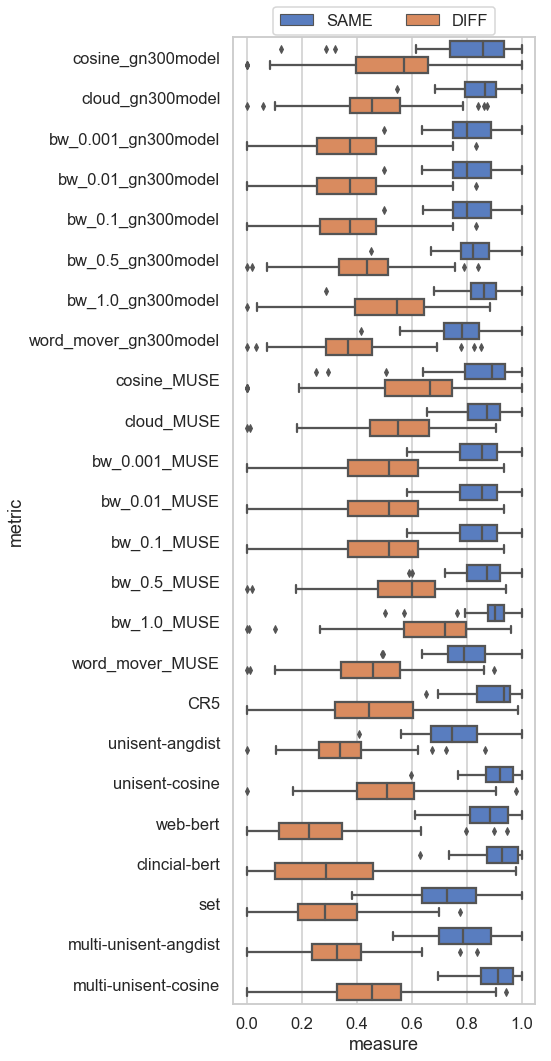

In [16]:
sns.set('talk')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,15))

sns.boxplot(y="metric", x="measure", hue="which_comparisons",
                    data=df, palette="muted", ax=ax)
plt.legend(loc='upper center',ncol=2,bbox_to_anchor=(0.5, 1.04))
plt.tight_layout()
#plt.savefig('boxplots_textsim-2020-03-28.png',dpi=100)
plt.show()